In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [6]:
import pickle5 as pickle
four_years_df = pd.read_pickle("cleaned_df.pkl")

In [4]:
four_years_df = four_years_df[four_years_df['MP']>250]
four_years_df = four_years_df.drop(['POS','Name','YEAR','Season','through_4_years','WITH SHOES','MP'],axis=1)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(four_years_df.drop(['BPM','Avg_BPM'],axis=1), four_years_df['BPM'], test_size = .3, random_state = 1)

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
X_train.shape
Y_train.shape
X_test.shape
Y_test.shape

(163,)

In [7]:
lassocv = LassoCV(alphas=None, n_alphas=200,cv=10, max_iter=100000, normalize=True, random_state=1)
lassocv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, n_alphas=200, normalize=True, random_state=1)

In [8]:
print(lassocv.alpha_)

0.005932436124993076


In [9]:
lasso_cvalpha = Lasso(alpha=lassocv.alpha_, normalize=True)
lasso_cvalpha.fit(X_train, Y_train)

Lasso(alpha=0.005932436124993076, normalize=True)

In [10]:
lasso_pred = lasso_cvalpha.predict(X_test)

In [11]:
mean_squared_error(Y_test,lasso_pred,squared=False)
mean_absolute_error(Y_test,lasso_pred)

2.1315270900065775

1.6863038221081919

In [ ]:
print(pd.Series(lasso_cvalpha.coef_, index=X_train.columns))

In [ ]:
Y_test.shape[0]

In [13]:
X_train_two_var = X_train[['SHUTTLE','HAND W']]
mod=sm.OLS(Y_train,X_train_two_var)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    BPM   R-squared (uncentered):                   0.331
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              93.31
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                    1.16e-33
Time:                        11:14:51   Log-Likelihood:                         -916.79
No. Observations:                 380   AIC:                                      1838.
Df Residuals:                     378   BIC:                                      1845.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SHUTTLE        0.2590      0.085      3.053      0.002       0.092       0.426
HAND W        -0.2924      0.022    -13.274      0.000      -0.336      -0.249
==============================================================================
Omnibus:                        3.806   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                4.500
Skew:                           0.053   Prob(JB):                        0.105
Kurtosis:                       3.522   Cond. No.                         4.37
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X_test_two_var = X_test[['SHUTTLE','HAND W']].to_numpy()
reg = LinearRegression().fit(X_train_two_var, Y_train)
preds=reg.predict(X_test_two_var)
mean_squared_error(Y_test,preds,squared=False)
mean_absolute_error(Y_test,preds)

2.1169868400826175

1.6800860567324598

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Preds vs Actuals')

(-3.0298422634881454,
 -2.2121287687801043,
 -8.7801766004415,
 5.8801766004415015)

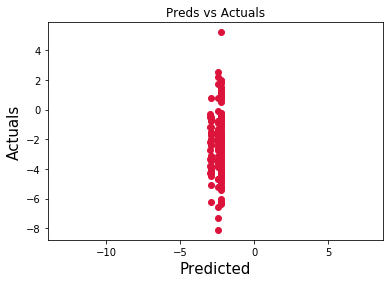

In [17]:
import matplotlib.pyplot as plt
plt.scatter(preds,Y_test , c='crimson')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Preds vs Actuals')
plt.axis('equal')
plt.show()

In [40]:
import statsmodels.formula.api as smf
inter_action = smf.ols(formula='BPM ~(Q("NO SHOES") + REACH + WEIGHT + WINGSPAN + Q("WING DIFF") + SHUTTLE + Q("3/4 SPRINT") + Q("STD VERT") + Q("MAX VERT") + BENCH +  Q("BODY FAT %")  + Q("HAND L") + Q("HAND W"))*C(Pos)', data=pd.concat([X_train, Y_train], axis=1, sort=False)).fit()
inter_action.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BPM   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.9012
Date:                Wed, 27 Oct 2021   Prob (F-statistic):              0.687
Time:                        11:35:07   Log-Likelihood:                -799.86
No. Observations:                 380   AIC:                             1730.
Df Residuals:                     315   BIC:                             1986.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.0242     27.221      0.111      0.912     -50.533      56.581
C(Pos)[T.PF]                   -22.6280     31.553     -0.717      0.474     -84.709      39.453
C(Pos)[T.PG]                    -3.9515     29.040     -0.136      0.892     -61.089      53.186
C(Pos)[T.SF]                    -4.0277     33.379     -0.121      0.904     -69.702      61.647
C(Pos)[T.SG]                    -6.4572     27.306     -0.236      0.813     -60.181      47.267
Q("NO SHOES")                    0.0088      0.224      0.039      0.969      -0.431       0.449
Q("NO SHOES"):C(Pos)[T.PF]       0.1669      0.254      0.658      0.511      -0.332       0.666
Q("NO SHOES"):C(Pos)[T.PG]       0.0238      0.293      0.081      0.935      -0.553       0.601
Q("NO SHOES"):C(Pos)[T.SF]      -0.0459      0.286     -0.161      0.873      -0.608       0.516
Q("NO SHOES"):C(Pos)[T.SG]      -0.1336      0.261     -0.512      0.609      -0.647       0.380
REACH                           -0.0385      0.292     -0.132      0.895      -0.613       0.535
REACH:C(Pos)[T.PF]               0.0235      0.293      0.080      0.936      -0.553       0.600
REACH:C(Pos)[T.PG]              -0.0491      0.377     -0.130      0.897      -0.791       0.693
REACH:C(Pos)[T.SF]               0.0437      0.355      0.123      0.902      -0.655       0.742
REACH:C(Pos)[T.SG]               0.0670      0.337      0.199      0.843      -0.596       0.730
WEIGHT                           0.0141      0.025      0.575      0.566      -0.034       0.062
WEIGHT:C(Pos)[T.PF]             -0.0047      0.031     -0.155      0.877      -0.065       0.055
WEIGHT:C(Pos)[T.PG]             -0.0299      0.033     -0.910      0.363      -0.094       0.035
WEIGHT:C(Pos)[T.SF]             -0.0130      0.035     -0.375      0.708      -0.081       0.055
WEIGHT:C(Pos)[T.SG]             -0.0098      0.027     -0.364      0.716      -0.063       0.043
WINGSPAN                        -0.0501      0.207     -0.242      0.809      -0.458       0.358
WINGSPAN:C(Pos)[T.PF]            0.0847      0.227      0.373      0.709      -0.362       0.531
WINGSPAN:C(Pos)[T.PG]            0.1471      0.266      0.554      0.580      -0.375       0.670
WINGSPAN:C(Pos)[T.SF]            0.0547      0.261      0.210      0.834      -0.458       0.567
WINGSPAN:C(Pos)[T.SG]            0.1045      0.235      0.445      0.657      -0.358       0.567
Q("WING DIFF")                  -0.0590      0.116     -0.509      0.611      -0.287       0.169
Q("WING DIFF"):C(Pos)[T.PF]     -0.0822      0.142     -0.577      0.564      -0.362       0.198
Q("WING DIFF"):C(Pos)[T.PG]      0.1233      0.159      0.774      0.439      -0.190       0.437
Q("WING DIFF"):C(Pos)[T.SF]      0.1005      0.154      0.652      0.515    

In [ ]:
preds_inter=inter_action.predict(X_test_two_var)
mean_squared_error(Y_test,preds_inter)
mean_absolute_error(Y_test,preds_inter)

In [ ]:
from pyearth import Earth
spline_model = Earth()
spline_model.fit(X_train,Y_train)
y_hat = spline_model.predict(X_test)
mean_squared_error(y_hat,Y_test)
mean_absolute_error(y_hat,Y_test)

In [ ]:
print(spline_model.summary())

In [ ]:
inter_action = smf.ols(formula='BPM ~ Q("MAX VERT") * Pos', data=pd.concat([X_train, Y_train], axis=1, sort=False)).fit()
inter_action.summary()